In [0]:
from keras.layers import GlobalAveragePooling2D,Activation,Flatten,Conv2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.preprocessing import image
import keras.backend as K
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import np_utils
import matplotlib.pyplot as plt
import skimage.transform

Using TensorFlow backend.


In [0]:
pip install image-classifiers

In [0]:
pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-3habqgve
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-3habqgve
  Running command git submodule update --init --recursive -q
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-cp36-none-any.whl size=19950 sha256=0a1f54bfce9a8651b5d700f089245b15a1401e26d0130cbc3824c2c904aa222e
  Stored in directory: /tmp/pip-ephem-wheel-cache-y57g6ghk/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
from classification_models.keras import Classifiers 
ResNet18, preprocess_input = Classifiers.get('resnet18') 
#from classification_models.resnet import ResNet18, preprocess_input
model = ResNet18((224, 224, 3), weights='imagenet',include_top=False)








44924928/44920640 [==============================] - 5s 0us/step


In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 224, 224, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
____________________________________________________________________________________________

In [0]:
num_classes = 100
batch_size = 128
epochs = 5

In [0]:
# add a global spatial average pooling layer
last_layer = model.output
x = Conv2D(1024, (3,3), strides=(1,1), use_bias=False, border_mode='same')(last_layer)
x = Conv2D(1024, (3,3), strides=(1,1), use_bias=False, border_mode='same')(x)
x = Conv2D(1024, (3,3), strides=(1,1), use_bias=False, border_mode='same')(x)
x = Conv2D(num_classes, (1,1), strides=(1,1), use_bias=False)(x)
x = GlobalAveragePooling2D()(x)
# a softmax layer for 10 classes
out = Activation('softmax')(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), strides=(1, 1), use_bias=False, padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), strides=(1, 1), use_bias=False, padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), strides=(1, 1), use_bias=False, padding="same")`
  after removing the cwd from sys.path.


In [0]:
# this is the model we will train
custom_resnet_model = Model(inputs=model.input, outputs=out)

In [0]:
custom_resnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 224, 224, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
____________________________________________________________________________________________

In [0]:
custom_resnet_model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# CIFAR10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Importing CIFAR10 dataset from Keras.
from keras.datasets import cifar100

# Loading the CIFAR10 60000 Training and 10000 Test data into respective numpy arrays
(train_features, train_labels), (test_features, test_labels) = cifar100.load_data()

# Setting the count, number of channels, rows and columns of training images
num_train, img_channels, img_rows, img_cols =  train_features.shape

# Setting the count of test images
num_test, _, _, _ =  test_features.shape

# Setting number of classes (10)
num_classes = len(np.unique(train_labels))

169009152/169001437 [==============================] - 11s 0us/step


In [0]:
train_features.shape

(50000, 32, 32, 3)

In [0]:
test_features.shape

(10000, 32, 32, 3)

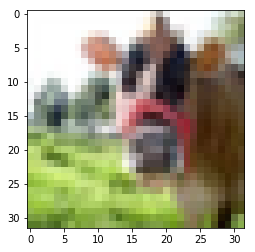

In [0]:
plt.imshow(train_features[0])

In [0]:
image = train_features[0]

In [0]:
new1[0] = skimage.transform.resize(image, (224, 224), mode='constant')

In [0]:
new

array([[[0.32653061, 0.32653061, 0.32653061],
        [0.40816327, 0.40816327, 0.40816327],
        [0.48979592, 0.48979592, 0.48979592],
        ...,
        [0.34957983, 0.37262905, 0.32076831],
        [0.29131653, 0.31052421, 0.26730692],
        [0.23305322, 0.24841937, 0.21384554]],

       [[0.40816327, 0.40816327, 0.40816327],
        [0.51020408, 0.51020408, 0.51020408],
        [0.6122449 , 0.6122449 , 0.6122449 ],
        ...,
        [0.43697479, 0.46578631, 0.40096038],
        [0.36414566, 0.38815526, 0.33413365],
        [0.29131653, 0.31052421, 0.26730692]],

       [[0.48979592, 0.48979592, 0.48979592],
        [0.6122449 , 0.6122449 , 0.6122449 ],
        [0.73469388, 0.73469388, 0.73469388],
        ...,
        [0.52436975, 0.55894358, 0.48115246],
        [0.43697479, 0.46578631, 0.40096038],
        [0.34957983, 0.37262905, 0.32076831]],

       ...,

       [[0.16710684, 0.23433373, 0.0787515 ],
        [0.20888355, 0.29291717, 0.09843938],
        [0.25066026, 0

In [0]:
type(train_features
    )

numpy.ndarray

In [0]:
newimages = []

In [0]:
for i in range(0,50000):
  image = train_features[i]
  newimage = skimage.transform.resize(image, (224, 224), mode='constant')
  newimages.append(newimage)

NameError: ignored

In [0]:
newImage.shape

(224, 224, 3)

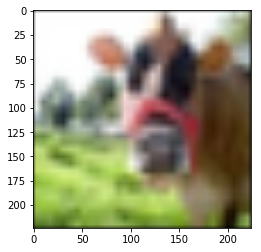

In [0]:
plt.imshow(newImage)

In [0]:
# Setting up the class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Plotting an image from each of the 10 classes
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Pixel normalization for training images
train_features = train_features.astype('float32')/255

# Pixel normalization for test images
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Specifying the path to store the weights
filepath="/content/gdrive/My Drive/EIP_Assignment5_Modified:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')

In [0]:
custom_resnet_model.fit(train_features, train_labels,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(test_features, test_labels),
              shuffle=False,
              callbacks=[checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 73s 1ms/step - loss: 4.4313 - acc: 0.0876 - val_loss: 4.0880 - val_acc: 0.1153

Epoch 00001: val_acc improved from -inf to 0.11530, saving model to /content/gdrive/My Drive/EIP_Assignment5_Modified:001-val_acc:0.115.hdf5
Epoch 2/5
50000/50000 [==============================] - 62s 1ms/step - loss: 3.5882 - acc: 0.1800 - val_loss: 3.1134 - val_acc: 0.2395

Epoch 00002: val_acc improved from 0.11530 to 0.23950, saving model to /content/gdrive/My Drive/EIP_Assignment5_Modified:002-val_acc:0.239.hdf5
Epoch 3/5
50000/50000 [==============================] - 62s 1ms/step - loss: 2.8740 - acc: 0.2762 - val_loss: 2.6291 - val_acc: 0.3219

Epoch 00003: val_acc improved from 0.23950 to 0.32190, saving model to /content/gdrive/My Drive/EIP_Assignment5_Modified:003-val_acc:0.322.hdf5
Epoch 4/5
50000/

In [0]:
custom_resnet_model.fit(train_features, train_labels,
              batch_size=batch_size,
              epochs=15,
              validation_data=(test_features, test_labels),
              shuffle=False,
              callbacks=[checkpoint])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 63s 1ms/step - loss: 1.9270 - acc: 0.4646 - val_loss: 2.1241 - val_acc: 0.4242

Epoch 00001: val_acc improved from 0.40200 to 0.42420, saving model to /content/gdrive/My Drive/EIP_Assignment5_Modified:001-val_acc:0.424.hdf5
Epoch 2/15
50000/50000 [==============================] - 63s 1ms/step - loss: 1.7176 - acc: 0.5112 - val_loss: 2.0762 - val_acc: 0.4384

Epoch 00002: val_acc improved from 0.42420 to 0.43840, saving model to /content/gdrive/My Drive/EIP_Assignment5_Modified:002-val_acc:0.438.hdf5
Epoch 3/15
50000/50000 [==============================] - 62s 1ms/step - loss: 1.5138 - acc: 0.5625 - val_loss: 2.0804 - val_acc: 0.4509

Epoch 00003: val_acc improved from 0.43840 to 0.45090, saving model to /content/gdrive/My Drive/EIP_Assignment5_Modified:003-val_acc:0.451.hdf5
Epoch 4/15
50000/50000 [==============================] - 62s 1ms/step - loss: 1.3047 - acc: 0.6177 - va

In [0]:
#Loading the best weights for prediction
custom_resnet_model.load_weights('/content/gdrive/My Drive/EIP_Assignment5_Modified:001-val_acc:0.760.hdf5')

In [0]:
def findMisclassifiedImages():
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
  
  # Pixel normalization for test images
  test_features = test_features.astype('float32')/255

  y_pred = custom_resnet_model.predict(test_features)
  y_pred = np.argmax(y_pred, axis=1)
  
  # Loading the CIFAR10 60000 Training and 10000 Test data into respective numpy arrays
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
  
  test_labels = test_labels.reshape(test_labels.shape[0],)
  
  incorrect = np.nonzero(y_pred != test_labels)
  
  top_incorrect = incorrect[0][0:50]
  
  result = [{"Predicted_Values": y_pred, "Misclassified_Images": top_incorrect}]
  
  return result

In [0]:
incorrect_images = findMisclassifiedImages()

In [0]:
top_incorrect = incorrect_images[0]['Misclassified_Images']

In [0]:
top_incorrect

In [0]:
y_pred = incorrect_images[0]['Predicted_Values']

In [0]:
#Function to get actual class names
def getClassName(classNumber):
  for i in range(len(class_names)):
    if(classNumber == i):
      className = class_names[i]
  return className

In [0]:
def plotMisclassifiedImages(misclassifiedImages, predictedValues):
  # Loading the CIFAR10 60000 Training and 10000 Test data into respective numpy arrays
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
  
  fig = plt.figure(figsize = (25,25)) 
  plots = []
  count = 0
  for i in range(5):
    for j in range(10):
        ax = plt.subplot2grid((10,10), (i,j))
        plt.imshow(test_features[misclassifiedImages[count]].reshape(32,32,3),cmap='gray',interpolation='none')
        fig.suptitle('50 Misclassified Images (Actual/Predicted Labels)', fontsize = 20)
        plt.title("{}, {}".format(getClassName(test_labels[misclassifiedImages[count]]), getClassName(predictedValues[misclassifiedImages[count]])))
        count = count+1
  plt.show()

In [0]:
plotMisclassifiedImages(top_incorrect, y_pred)

In [0]:
#Function to plot original image and GradCAM image
def plotOrigGradCam(top_incorrect):
  k = 0
  
  for i in range(5):
    for j in range(10):
      (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

      # Pixel normalization for test images
      test_features = test_features.astype('float32')/255

      # convert class labels to binary class labels
      test_labels = np_utils.to_categorical(test_labels, num_classes)
      
      img = test_features[top_incorrect[k]]
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)

      preds = custom_resnet_model.predict(x)
      class_idx = np.argmax(preds[0])
      class_output = custom_resnet_model.output[:, class_idx]
      last_conv_layer = custom_resnet_model.get_layer("stage2_unit2_conv2")

      grads = K.gradients(class_output, last_conv_layer.output)[0]
      pooled_grads = K.mean(grads, axis=(0, 1, 2))
      iterate = K.function([custom_resnet_model.input], [pooled_grads, last_conv_layer.output[0]])
      pooled_grads_value, conv_layer_output_value = iterate([x])
      for i in range(128):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
      heatmap = np.mean(conv_layer_output_value, axis=-1)
      heatmap = np.maximum(heatmap, 0)
      heatmap /= np.max(heatmap)

      (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

      img = test_features[top_incorrect[k]]
      heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
      heatmap = np.uint8(255 * heatmap)
      heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
      superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

      fig = plt.figure(figsize = (14,40)) 
      sub = fig.add_subplot(10, 5, (k + 1))
      vis = np.concatenate((img, superimposed_img), axis=0)
      sub.imshow(vis, interpolation='bilinear')
      plt.title("Original: " + getClassName(test_labels[top_incorrect[k]])+"    Predicted: " + getClassName(class_idx))
      k += 1

      cv2.waitKey(0)
  

In [0]:
#Plotting original and GradCAM images for all the selected images  
plotOrigGradCam(top_incorrect)

#INTRODUCING CUTOUT

In [0]:
# Specifying the path to store the weights
filepath="/content/gdrive/My Drive/EIP_Assignment5_Cutout:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')

In [0]:
!wget https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py

from random_eraser import get_random_eraser

In [0]:
from keras.preprocessing.image import ImageDataGenerator

#Adding cutout as a preprocessing function
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))


# Train the model
model_info = custom_resnet_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[checkpoint])

#Loading the best weights with cutout

In [0]:
custom_resnet_model.load_weights('/content/gdrive/My Drive/EIP_Assignment5_Cutout:033-val_acc:0.825.hdf5')

In [0]:
incorrect_cutout = findMisclassifiedImages()

In [0]:
top_incorrect_cutout = incorrect_cutout[0]['Misclassified_Images']

In [0]:
top_incorrect_cutout

In [0]:
y_pred_cutout = incorrect_cutout[0]['Predicted_Values']

In [0]:
plotMisclassifiedImages(top_incorrect_cutout, y_pred_cutout)

In [0]:
#Plotting original and GradCAM images for all the selected images  
plotOrigGradCam(top_incorrect_cutout)

#GradCAM for corrected images with cutout

In [0]:
#Function to plot original image and GradCAM image
def plotOrigGradCam(image_number):
  
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

  # Pixel normalization for test images
  test_features = test_features.astype('float32')/255

  # convert class labels to binary class labels
  test_labels = np_utils.to_categorical(test_labels, num_classes)
  
  img = test_features[image_number]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  preds = custom_resnet_model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = custom_resnet_model.output[:, class_idx]
  last_conv_layer = custom_resnet_model.get_layer("stage2_unit2_conv2")
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([custom_resnet_model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(128):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
  
  img = test_features[image_number]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  final = np.concatenate((img, superimposed_img), axis=0)
  plt.imshow(final, interpolation='bilinear')
  plt.title("Original: " + getClassName(test_labels[image_number])+"    Predicted: " + getClassName(class_idx))
  plt.imshow(final)
  plt.show()
  cv2.waitKey(0)

In [0]:
corrected_images = [225,178,172,170,162,158,149,128,51,12,137,186,192,193,195,201,210,143,145,52,57,59,61,74,77,86,106,119,121,3,48]

In [0]:
#Running a loop to plot original and GradCAM image for all the corrected images
for i in range(len(corrected_images)):
  plotOrigGradCam(corrected_images[i])